In [1]:
from aquabyte_mask_rcnn.visualize import display_instances
import aquabyte_mask_rcnn.model as modellib
import skimage
import aquabyte_mask_rcnn.coco as coco
from aquabyte_mask_rcnn.config import Config

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
MODEL_DIR = '/root/data/models/mask_rcnn/run0/logs/fish20180328T0024/'

In [3]:
class ShapesConfig(Config):
    """Configuration for traininspect_model.ipynb This notebook goes in depth into the steps performed to detect and segment objects. It provides visualizations of every step of the pipeline.ing on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "fish"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 3 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 512)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 64

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 1000

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
    
config = ShapesConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_SHAPES                [[128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]
 [  8   8]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  512
IMAGE_MIN_DIM                  512
IMAGE_PADDING                  True
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           fish
NUM_CLASSES                    2
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE    

In [4]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights('/root/data/models/mask_rcnn/run0/logs/fish20180328T0024/mask_rcnn_fish_0003.h5', by_name=True)

In [5]:
image = skimage.io.imread('/root/data/blender_data/test/training/validation_low_rez/collage_1.jpeg')
# Run detection
results = model.detect([image], verbose=1)

Processing 1 images
image                    shape: (603, 614, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max:  614.00000


In [6]:
from aquabyte_mask_rcnn.visualize import display_instances
import numpy as np
from PIL import Image

In [7]:
class_names = ['background', 'fish']

In [8]:
test = np.array(Image.open('/root/data/blender_data/test/training/validation_low_rez/collage_1.jpeg').resize((512, 512)))

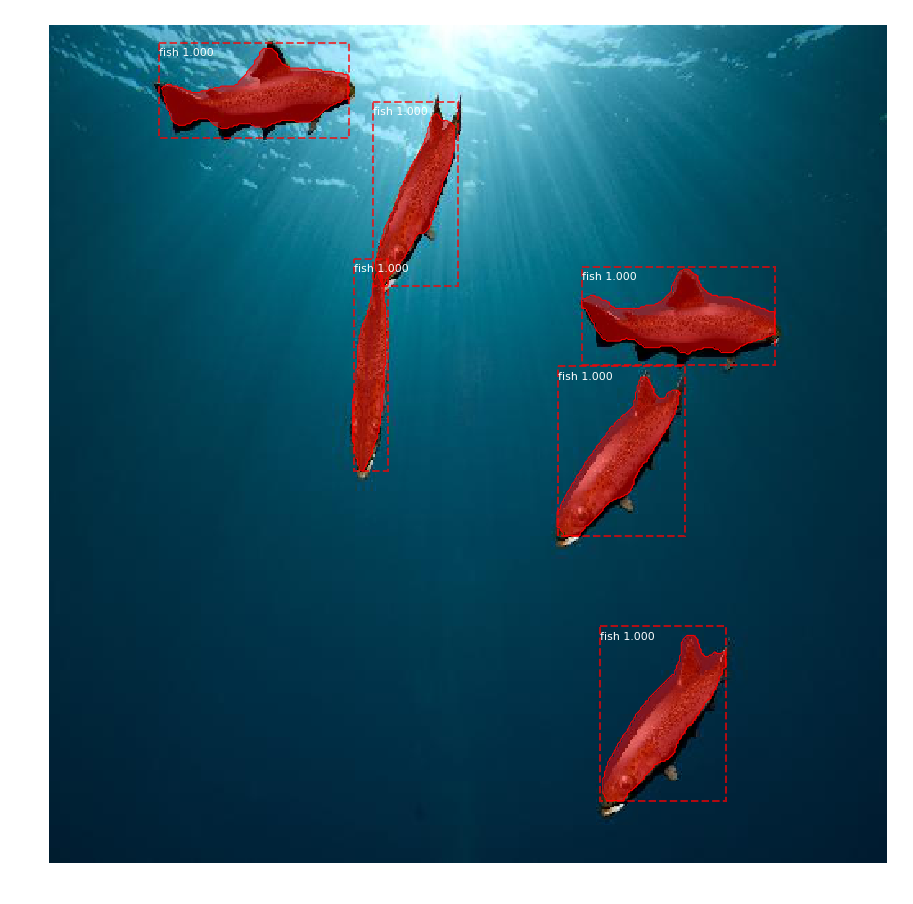

In [9]:
# Visualize results
r = results[0]
display_instances(test, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])